In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import glob

%load_ext autoreload
%autoreload 2
%matplotlib inline

matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize']=(12,8)
matplotlib.rcParams['legend.fontsize']=20

In [70]:
data=pd.read_csv('data/AMACREF3_ENDEAVOUR_COUNTS.csv',sep='\t')

In [72]:
ditdata=data[data.DAH_MID==190].sort_values('DIT_MID')
for freqset,freqsetgroup in ditdata.groupby('FreqSetting'):
    plt.plot(freqsetgroup.DIT_MID*40/100,freqsetgroup.Reliability,'.-',label='FreqSet = {}'.format(freqset))
    plt.ylabel('Reliability')
    plt.xlabel('DIT Count [40MHz Clock]')
plt.legend(frameon=False)
#minval=ditdata[ditdata.Reliability>0.5].DIT_MID.min()/100*40
#maxval=ditdata[ditdata.Reliability>0.5].DIT_MID.max()/100*40
#print(minval,maxval)
#plt.text(minval,0.9,s='{:0.1f}'.format(minval))
#plt.text(maxval,0.9,s='{:0.1f}'.format(maxval))

In [31]:
dahdata=data[data.DIT_MID==35]

plt.plot(dahdata.DAH_MID*40/100,dahdata.Reliability,'.')
plt.ylabel('Reliability')
plt.xlabel('DAH Count [40MHz Clock]')

minval=dahdata[dahdata.Reliability>0.5].DAH_MID.min()/100*40
maxval=dahdata[dahdata.Reliability>0.5].DAH_MID.max()/100*40
plt.text(minval,0.9,s='{:0.1f}'.format(minval))
plt.text(maxval,0.9,s='{:0.1f}'.format(maxval))

In [32]:
data

DIT_MID  DAH_MID  Reliability
0         10      190          0.0
1         11      190          0.0
2         12      190          0.0
3         13      190          0.0
4         14      190          0.0
5         15      190          0.0
6         16      190          0.0
7         17      190          1.0
8         18      190          1.0
9         19      190          1.0
10        20      190          1.0
11        21      190          1.0
12        22      190          1.0
13        23      190          1.0
14        24      190          1.0
15        25      190          1.0
16        26      190          1.0
17        27      190          1.0
18        28      190          1.0
19        29      190          1.0
20        30      190          1.0
21        31      190          1.0
22        32      190          1.0
23        33      190          1.0
24        34      190          1.0
25        35      190          1.0
26        36      190          1.0
27        37      190          1.0
28        38      190          1.0
29        39      190          1.0
..       ...      ...          ...
382       35      371          0.0
383       35      372          0.0
384       35      373          0.0
385       35      374          0.0
386       35      375          0.0
387       35      376          0.0
388       35      377          0.0
389       35      378          0.0
390       35      379          0.0
391       35      380          0.0
392       35      381          0.0
393       35      382          0.0
394       35      383          0.0
395       35      384          0.0
396       35      385          0.0
397       35      386          0.0
398       35      387          0.0
399       35      388          0.0
400       35      389          0.0
401       35      390          0.0
402       35      391          0.0
403       35      392          0.0
404       35      393          0.0
405       35      394          0.0
406       35      395          0.0
407       35      396          0.0
408       35      397          0.0
409       35      398          0.0
410       35      399          0.0
411       35      400          0.0

[412 rows x 3 columns]

In [141]:
rampdata=zerodata[(zerodata.RampGain==0)]
for ch,chdata in rampdata.groupby('Channel'):
    plt.hist(chdata.Counts,range=(-0.5,63.5),bins=64,label=ch)
plt.xlabel('Input Voltage [V]')
plt.ylabel('AMAC Reading [Counts]')
plt.title('AMACREF2')
plt.legend(frameon=False,ncol=2,title='Channel')

In [142]:
ZERO_CAL  =zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH4' )].Counts.mean()
ZERO_Hrefx=zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH10')].Counts.mean()
ZERO_Hrefy=zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH11')].Counts.mean()
ZERO_PTAT =zerodata[(zerodata.RampGain==0)&(zerodata.Channel=='CH15')].Counts.mean()

In [143]:
CALdata  =data[(data.RampGain==0)&(data.Channel=='CAL'  )]
Hrefxdata=data[(data.RampGain==0)&(data.Channel=='Hrefx')]
Hrefydata=data[(data.RampGain==0)&(data.Channel=='Hrefy')]
PTATdata =data[(data.RampGain==0)&(data.Channel=='PTAT' )]

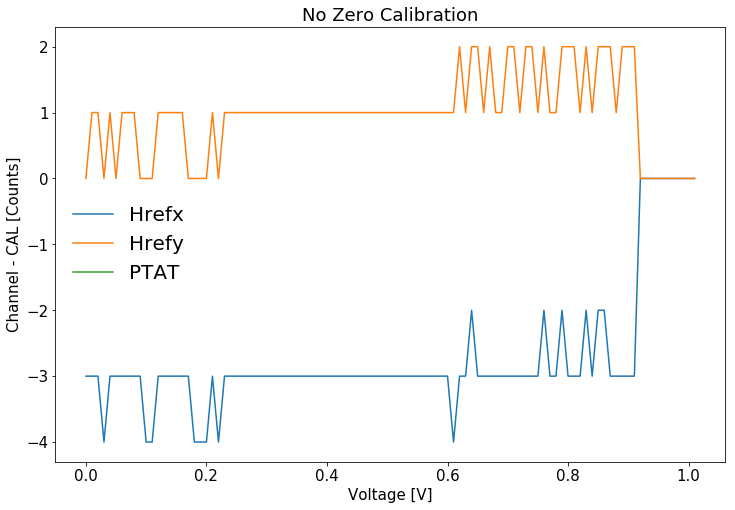

In [144]:
plt.plot(CALdata.Voltage,Hrefxdata.Counts-CALdata.Counts,label='Hrefx')
plt.plot(CALdata.Voltage,Hrefydata.Counts-CALdata.Counts,label='Hrefy')
plt.plot(CALdata.Voltage,PTATdata.Counts -CALdata.Counts,label='PTAT')
plt.xlabel('Voltage [V]')
plt.ylabel('Channel - CAL [Counts]')
plt.title('No Zero Calibration')
plt.legend(frameon=False)

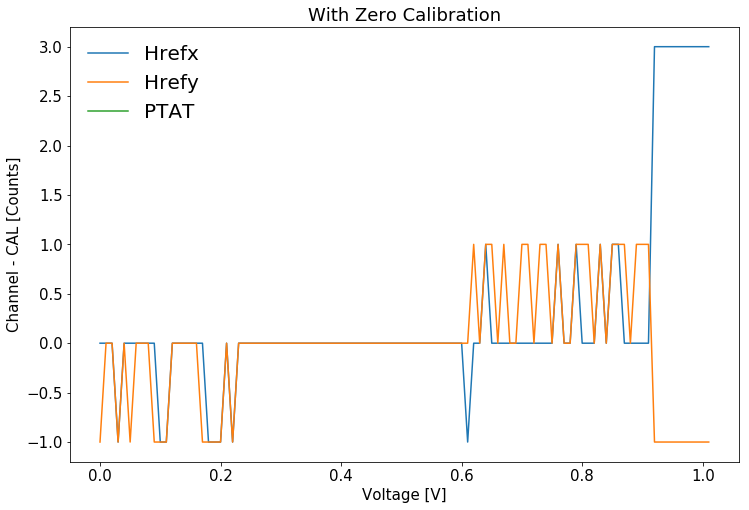

In [145]:
plt.plot(CALdata.Voltage,Hrefxdata.Counts-ZERO_Hrefx-CALdata.Counts+ZERO_CAL,label='Hrefx')
plt.plot(CALdata.Voltage,Hrefydata.Counts-ZERO_Hrefy-CALdata.Counts+ZERO_CAL,label='Hrefy')
plt.plot(CALdata.Voltage,PTATdata.Counts -ZERO_PTAT -CALdata.Counts+ZERO_CAL,label='PTAT')
plt.xlabel('Voltage [V]')
plt.ylabel('Channel - CAL [Counts]')
plt.title('With Zero Calibration')
plt.legend(frameon=False)